In [1]:
import numpy as np
import pandas as pd

In [2]:
X_train = pd.read_csv("./X_train_NHkHMNU.csv")
X_test = pd.read_csv("./X_test_final.csv")
y_train = pd.read_csv("./y_train_ZAN5mwg.csv")
# y_test = pd.read_csv("./y_test_random_final.csv")

In [3]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494 entries, 0 to 1493
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1494 non-null   int64  
 1   DAY_ID            1494 non-null   int64  
 2   COUNTRY           1494 non-null   object 
 3   DE_CONSUMPTION    1494 non-null   float64
 4   FR_CONSUMPTION    1494 non-null   float64
 5   DE_FR_EXCHANGE    1469 non-null   float64
 6   FR_DE_EXCHANGE    1469 non-null   float64
 7   DE_NET_EXPORT     1370 non-null   float64
 8   FR_NET_EXPORT     1424 non-null   float64
 9   DE_NET_IMPORT     1370 non-null   float64
 10  FR_NET_IMPORT     1424 non-null   float64
 11  DE_GAS            1494 non-null   float64
 12  FR_GAS            1494 non-null   float64
 13  DE_COAL           1494 non-null   float64
 14  FR_COAL           1494 non-null   float64
 15  DE_HYDRO          1494 non-null   float64
 16  FR_HYDRO          1494 non-null   float64


In [4]:
nulls = X_train.isna().sum()[X_train.isna().sum() > 0]
nulls

DE_FR_EXCHANGE     25
FR_DE_EXCHANGE     25
DE_NET_EXPORT     124
FR_NET_EXPORT      70
DE_NET_IMPORT     124
FR_NET_IMPORT      70
DE_RAIN            94
FR_RAIN            94
DE_WIND            94
FR_WIND            94
DE_TEMP            94
FR_TEMP            94
dtype: int64

In [46]:
X = pd.merge(left=X_train, right=y_train, left_on="ID", right_on="ID").sort_values(by="DAY_ID")
X

,ID,DAY_ID,COUNTRY,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,...,DE_RAIN,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET,TARGET
742,1057,0,FR,0.048418,-0.465067,-0.079296,0.079296,NaN,0.650577,NaN,...,-0.987968,-0.856204,-0.655528,-1.099226,0.279885,0.583874,-1.071996,-0.074767,0.798003,0.108953
1211,1179,1,FR,0.966997,1.222131,0.331356,-0.331356,0.405549,0.778627,-0.405549,...,-0.370990,-0.497520,-1.184018,-1.465608,1.349212,0.231602,1.480313,0.931562,0.822047,-0.063369
1408,1327,2,FR,-0.068972,-0.667390,-1.102015,1.102015,-1.080403,0.256736,1.080403,...,-0.344600,-0.372156,-0.623041,-0.926064,-0.148950,0.641235,1.802550,1.140920,0.900434,2.575976
1468,111,2,DE,-0.068972,-0.667390,-1.102015,1.102015,-1.080403,0.256736,1.080403,...,-0.344600,-0.372156,-0.623041,-0.926064,-0.148950,0.641235,1.802550,1.140920,0.900434,0.861270
329,2016,3,FR,-0.134670,-0.834564,-1.051716,1.051716,-1.881881,-0.612133,1.881881,...,-1.394561,-1.118297,0.244859,0.488650,-1.710888,-0.951057,0.440121,-0.064550,-0.032756,0.068905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007,1987,1212,FR,-0.046100,-0.520506,-0.270515,0.270515,-0.137917,-0.789824,0.137917,...,-0.039379,-0.237434,1.358211,1.123953,-0.707839,-0.308232,0.017778,0.072168,-0.160792,-0.425474
986,771,1212,DE,-0.046100,-0.520506,-0.270515,0.270515,-0.137917,-0.789824,0.137917,...,-0.039379,-0.237434,1.358211,1.123953,-0.707839,-0.308232,0.017778,0.072168,-0.160792,-0.144320
1465,472,1213,DE,1.407027,1.313254,-0.456126,0.456126,0.333142,-0.069222,-0.333142,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.103642,-0.633007,0.214805,0.147587
873,1688,1213,FR,1.407027,1.313254,-0.456126,0.456126,0.333142,-0.069222,-0.333142,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.103642,-0.633007,0.214805,-3.003988


In [135]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.base import BaseEstimator, TransformerMixin


# de_columns = train.columns[train.columns.str.contains('DE')].to_list()

# gaussian = (target_de > (target_de.mean() - 3*target_de.std())) & (target_de < (target_de.mean() + 3*target_de.std()))

# train_de = train_de.loc[gaussian]
# target_de = target_de.loc[gaussian]


train = X.loc[X['COUNTRY'] == "DE"].drop(X.columns[X.columns.str.contains("FR")], axis=1).drop('TARGET', axis=1)
test = X.loc[X['COUNTRY'] == "DE",'TARGET'].copy()

class RollingTransformer(BaseEstimator, TransformerMixin):
    
    def __init__(self, window: int = 3, center: bool = False):
        self.window = window
        self.center = center

    def fit(self, X, y = None):
        return self
    
    def transform(self, X: pd.DataFrame , y=None):
        return X.rolling(window=self.window, center=self.center, min_periods=1).mean(numeric_only=True).fillna(X)



pipeline = Pipeline([('knn_imputer', KNNImputer(n_neighbors=5)), 
              ('standard_scaler', StandardScaler().set_output(transform='pandas')),
              ('rolling', RollingTransformer(center=False))])
# data: pd.DataFrame = pd.DataFrame(de_pipeline.fit_transform(train)) #type:ignore
pipeline

Pipeline(steps=[('knn_imputer', KNNImputer()),
                ('standard_scaler', StandardScaler()),
                ('rolling', RollingTransformer())])

In [5]:
pd.set_option('display.max_rows', 500)
def correlation_with(X, y):
  return X.corrwith(y , method='spearman').abs().sort_values(ascending=False)

In [8]:
correlation_with(X_train.select_dtypes(include='float64'), y_train['TARGET'].shift(-1))

DE_GAS              0.072916
CARBON_RET          0.039812
FR_WIND             0.037342
DE_TEMP             0.033532
DE_RESIDUAL_LOAD    0.033232
FR_NUCLEAR          0.029832
GAS_RET             0.029830
DE_FR_EXCHANGE      0.027790
FR_DE_EXCHANGE      0.027790
FR_WINDPOW          0.026935
FR_COAL             0.023455
DE_WIND             0.020377
DE_SOLAR            0.020057
DE_WINDPOW          0.019847
FR_GAS              0.017708
DE_CONSUMPTION      0.016217
FR_NET_EXPORT       0.015108
FR_NET_IMPORT       0.015108
FR_TEMP             0.014776
DE_NUCLEAR          0.014688
DE_RAIN             0.013250
DE_COAL             0.012792
COAL_RET            0.011175
FR_CONSUMPTION      0.009535
DE_NET_EXPORT       0.008755
DE_NET_IMPORT       0.008755
FR_RAIN             0.007857
FR_HYDRO            0.006690
DE_HYDRO            0.006018
FR_RESIDUAL_LOAD    0.005724
DE_LIGNITE          0.003583
FR_SOLAR            0.003470
dtype: float64

In [12]:
X_train['DE_RESIDUAL_LOAD']

0       0.626666
1      -0.395469
2       1.336625
3      -1.191889
4       0.571613
          ...   
1489    1.547782
1490    1.358927
1491    1.493870
1492   -0.137667
1493   -0.359599
Name: DE_RESIDUAL_LOAD, Length: 1494, dtype: float64

In [141]:
correlation_with(pd.DataFrame( train.select_dtypes(include='float64')), test)

DE_RESIDUAL_LOAD    0.324335
DE_NET_IMPORT       0.306204
DE_NET_EXPORT       0.306204
DE_WINDPOW          0.300933
DE_GAS              0.253410
DE_HYDRO            0.217900
DE_WIND             0.162500
DE_COAL             0.142054
DE_LIGNITE          0.124605
DE_CONSUMPTION      0.071736
DE_TEMP             0.024554
DE_SOLAR            0.021202
COAL_RET            0.020653
GAS_RET             0.015835
DE_RAIN             0.012565
DE_NUCLEAR          0.012366
CARBON_RET          0.010366
dtype: float64

In [195]:
np.array([train['DE_CONSUMPTION'].autocorr(lag=i) for i in range(1,100)]).max()

0.07622088858317293

In [188]:
train['DE_RESIDUAL_LOAD'].autocorr(lag=68)

0.10378901130311252

In [192]:
train['DE_WINDPOW'].autocorr(lag=7)

-0.031532704525243975

In [124]:
from scipy.stats import spearmanr
from sklearn.metrics import make_scorer

def spearmanScore(y, y_pred):
    return spearmanr(y, y_pred).correlation

score_metric = make_scorer(spearmanScore)  

In [134]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import Ridge

grid = GridSearchCV(pipeline, {
    # 'rolling__window': [1, 2, 3, 5, 10, 20],
    # 'rolling__center': [True, False],
    'model__C': [1000],
    'model__max_iter': [1000000],
    'model__kernel': ['poly'],
    'model__degree': [100]
}, scoring=score_metric, cv=5).fit(train.select_dtypes(include='float64'), test)

# grid.get_params()
print(grid.best_estimator_)
print(grid.best_score_)
# grid.best_estimator_['model'].coef_

c:\Users\talal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\talal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\talal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\talal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warning

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\talal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\talal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\talal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py", line 270, in fit
    raise ValueError(
ValueError: The dual coefficients or intercepts are not finite. The input data may contain large values and need to bepreprocessed.


<Axes: xlabel='DAY_ID', ylabel='DE_RESIDUAL_LOAD'>

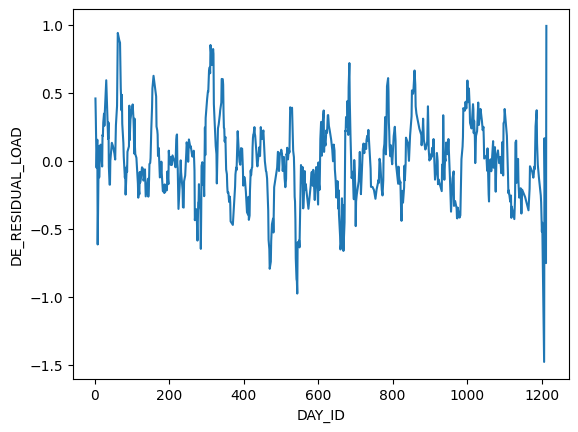

In [24]:
import seaborn as sns

# data['DE_RESIDUAL_LOAD']


sns.lineplot(data=numeric_means, x=X["DAY_ID"], y="DE_RESIDUAL_LOAD")

<Axes: xlabel='DAY_ID', ylabel='DE_RESIDUAL_LOAD_sp_1'>

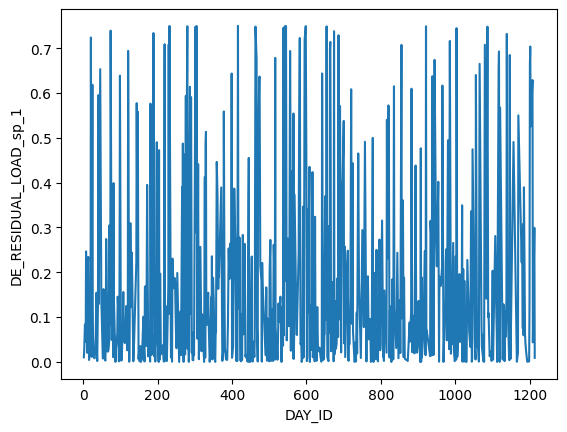

In [67]:
import seaborn as sns

# sns.lineplot(data=data, x="DAY_ID", y='DE_RESIDUAL_LOAD_sp_2')
sns.lineplot(data=data, x="DAY_ID", y='DE_RESIDUAL_LOAD_sp_1')
# sns.lineplot(data=data, x="DAY_ID", y='DE_RESIDUAL_LOAD_sp_0')

In [166]:
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import KNNImputer

train = X_train.drop(['DAY_ID', 'ID'], axis=1)
test = y_train['TARGET'].copy()

col_pipeline = make_column_transformer(
    (make_pipeline(KNNImputer(n_neighbors=5), StandardScaler()), make_column_selector(dtype_include=['float64'])),
    (OneHotEncoder(sparse_output=False), make_column_selector(dtype_include=['object'])),
    verbose_feature_names_out=False
).set_output(transform='pandas')

pipe = make_pipeline(
    col_pipeline,
)

In [167]:
train = pipe.fit_transform(train)

In [50]:
from scipy.stats import spearmanr
from sklearn.metrics import make_scorer

def spearmanScore(y, y_pred):
    return spearmanr(y, y_pred).correlation

score_metric = make_scorer(spearmanScore)  

In [51]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import Ridge

grid = GridSearchCV(Ridge(), {
    'alpha': [0.1, 1, 10, 100, 1000]
}, scoring=score_metric).fit(data, test)
print(grid.best_estimator_)
print(grid.best_score_)

ValueError: 
All the 25 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\talal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\talal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py", line 1126, in fit
    X, y = self._validate_data(
  File "c:\Users\talal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 584, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "c:\Users\talal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py", line 1106, in check_X_y
    X = check_array(
  File "c:\Users\talal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py", line 879, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "c:\Users\talal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\_array_api.py", line 185, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "c:\Users\talal\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\generic.py", line 1998, in __array__
    arr = np.asarray(values, dtype=dtype)
ValueError: could not convert string to float: 'DE'


In [169]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

grid = GridSearchCV(DecisionTreeRegressor(), {
    'max_depth': [2, 3, 4, 5, 10],
    'max_features': [1,2,4, 5, 6, 7],
    'min_samples_split': [50, 70, 100, 150],
    'min_samples_leaf': [20, 40, 60, 70, 80, 100, 150],
}, scoring=score_metric,).fit(train, test)
print(grid.best_estimator_)
print(grid.best_score_)

DecisionTreeRegressor(max_depth=3, max_features=4, min_samples_leaf=100,
                      min_samples_split=100)
0.19688589727174066


In [110]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.svm import SVR, LinearSVR

grid = GridSearchCV(LinearSVR(max_iter=1000000), {
    'C': [5, 10, 100],
    'epsilon': [0.001, 0.01],
    'intercept_scaling': [0.001, 0.01] 
}, scoring=score_metric).fit(train, test)
print(grid.best_estimator_)
print(grid.best_score_)

LinearSVR(C=5, epsilon=0.01, intercept_scaling=0.001, max_iter=1000000)
0.3824459130108736


In [81]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.svm import SVR

grid = GridSearchCV(SVR(kernel='poly'), {
    'C': [10, 100],
    'coef0': [10, 100],
    'gamma': [0.0001, 0.001],
    'epsilon': [0.1],
}, scoring=score_metric).fit(train_de, target_de)
print(grid.best_estimator_)
print(grid.best_score_)

SVR(C=10, coef0=10, gamma=0.001, kernel='poly')
0.3791623734533183


In [78]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.svm import SVR

# columns = ['DE_GAS', 'DE_WIND', 'DE_HYDRO', 'DE_RESIDUAL_LOAD', 'DE_NET_IMPORT', 'DE_WINDPOW', 'DE_COAL', 'DE_LIGNITE', 'DE_RAIN']

# cross_val_score(Ridge(), X, y, scoring=score_metric, cv=3)
grid = GridSearchCV(SVR(), {
    'C': [0.01, 0.1, 1, 10, 10],
    'gamma': [0.001, 0.01,0.1],
    'epsilon': [0.001, 0.01, 0.1, 1],
}, scoring=score_metric).fit(train_de, target_de)
print(grid.best_estimator_)
print(grid.best_score_)

SVR(C=1, gamma=0.01)
0.37705865204349454


In [33]:
from sklearn.impute import KNNImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler


pipeline = make_column_transformer(
    (make_pipeline(KNNImputer(n_neighbors=5), StandardScaler()), make_column_selector(dtype_include='float64')),
    (OneHotEncoder(sparse_output=False), make_column_selector(dtype_include='object')),
    remainder='passthrough',
    verbose_feature_names_out=False
).set_output(transform='pandas')

In [34]:
pipeline

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline',
                                 Pipeline(steps=[('knnimputer', KNNImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001A54F8B2D70>),
                                ('onehotencoder',
                                 OneHotEncoder(sparse_output=False),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001A54F8B2F50>)],
                  verbose_feature_names_out=False)

In [35]:

def get_trains_by_countrys(df: pd.DataFrame = X_train):
  train: pd.DataFrame = pipeline.fit_transform(df) #type: ignore
  fr_columns = train.columns[train.columns.str.contains('FR')]
  de_columns = train.columns[train.columns.str.contains('DE')]
  train_fr = train.loc[train['COUNTRY_FR'] == 1,  ['DAY_ID', *fr_columns.to_list()]].drop('COUNTRY_FR', axis=1).copy()
  train_de = train.loc[train['COUNTRY_DE'] == 1,  ['DAY_ID', *de_columns.to_list()]].drop('COUNTRY_DE', axis=1).copy()
  train_fr = train_fr.sort_values(by='DAY_ID')
  train_de = train_de.sort_values(by='DAY_ID')
  target_fr = y_train.loc[train_fr.index, 'TARGET'] 
  target_de = y_train.loc[train_de.index, 'TARGET']
  return ({
      'fr': (train_fr, target_fr), 'de': (train_de, target_de)
      })

In [36]:
datasets_train = get_trains_by_countrys()

In [37]:
X_fr, X_de = datasets_train['fr'][0], datasets_train['de'][0] 

In [38]:
y_fr, y_de = datasets_train['fr'][1], datasets_train['de'][1]

In [39]:
pd.set_option('display.max_rows', 500)
def correlation_with(X, y):
  return X.corrwith(y).abs().sort_values(ascending=False)

In [40]:
correlation_with(X_fr, y_fr)

FR_WINDPOW          0.107403
FR_HYDRO            0.070002
FR_RAIN             0.041716
FR_TEMP             0.041153
DE_FR_EXCHANGE      0.040493
FR_DE_EXCHANGE      0.040493
FR_RESIDUAL_LOAD    0.038176
FR_NET_EXPORT       0.037845
FR_NET_IMPORT       0.037845
FR_COAL             0.031529
FR_WIND             0.030127
DAY_ID              0.025336
FR_SOLAR            0.013828
FR_CONSUMPTION      0.009998
FR_GAS              0.007433
FR_NUCLEAR          0.007304
dtype: float64

In [41]:
correlation_with(X_de, y_de)

DE_RESIDUAL_LOAD    0.250898
DE_NET_EXPORT       0.250616
DE_NET_IMPORT       0.250616
DE_WINDPOW          0.250204
DE_GAS              0.177561
DE_WIND             0.146793
DE_HYDRO            0.123676
DE_COAL             0.097803
DE_LIGNITE          0.095619
DE_FR_EXCHANGE      0.084194
FR_DE_EXCHANGE      0.084194
DE_TEMP             0.057052
DE_CONSUMPTION      0.051182
DE_RAIN             0.010888
DAY_ID              0.008573
DE_SOLAR            0.007162
DE_NUCLEAR          0.006729
dtype: float64

In [42]:
from scipy.stats import spearmanr
from sklearn.metrics import make_scorer

def spearmanScore(y, y_pred):
    return spearmanr(y, y_pred).correlation

score_metric = make_scorer(spearmanScore)  

In [43]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest


loc = IsolationForest(random_state=0)
gaussian = (y_de > (y_de.mean() - 3*y_de.std())) & (y_de < (y_de.mean() + 3*y_de.std()))
isolateds = (loc.fit_predict(X_de) == 1) & gaussian
print(isolateds.sum())

559


In [45]:
from sklearn.linear_model import HuberRegressor, LinearRegression, Lasso, RidgeCV, ElasticNet, Ridge
from sklearn.svm import LinearSVR
from sklearn.linear_model import SGDRegressor   
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import TimeSeriesSplit


columns = ['DE_GAS', 'DE_WIND', 'DE_HYDRO', 'DE_RESIDUAL_LOAD', 'DE_NET_IMPORT', 'DE_WINDPOW', 'DE_COAL', 'DE_LIGNITE', 'DE_RAIN']
X = X_de.copy().loc[gaussian]
y = y_de.copy()[gaussian]
# X['DE_RESIDUAL_LOAD'] = np.sqrt(X['DE_RESIDUAL_LOAD'])

# cross_val_score(Ridge(), X, y, scoring=score_metric, cv=3)
grid = GridSearchCV(SVR(kernel='poly', C=10000, max_iter=1000000, degree=2 ), {
    # 'epsilon': [0.001, 0.01, 0.1, 1, 10, 100],
    # 'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
    # 'l1_ratio': [0.1, 0.5, 0.8, 1]
}, scoring=score_metric).fit(X, y)
print(grid.best_estimator_)
print(grid.best_score_)

c:\Users\talal\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\talal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\talal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py", line 192, in fit
    X, y = self._validate_data(
  File "c:\Users\talal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 584, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "c:\Users\talal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py", line 1106, in check_X_y
    X = check_array(
  File "c:\Users\talal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py", line 921, in check_array
    _assert_all_finite(
  File "c:\Users\talal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py", line 161, in _assert_all_finite
    raise ValueError(msg_err)
ValueError: Input X contains NaN.
SVR does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


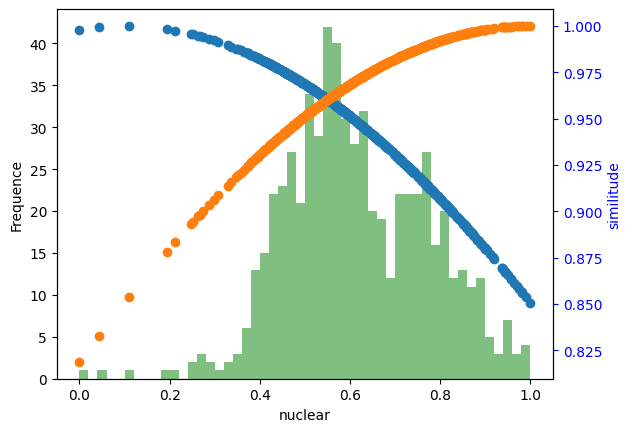

In [153]:
from sklearn.metrics.pairwise import rbf_kernel
import matplotlib.pyplot as plt

nucl_simil = rbf_kernel(X[['DE_CONSUMPTION']], [[0.1], [1]], gamma=0.2)

fig, ax1 = plt.subplots()

# Tracer l'histogramme de la première covariable
ax1.hist(X['DE_CONSUMPTION'], bins=50, alpha=0.5, color='g')
ax1.set_xlabel('nuclear')
ax1.set_ylabel('Frequence')

# Créer un deuxième axe partageant le même x-axis
ax2 = ax1.twinx()
# Tracer la nouvelle covariable
ax2.scatter(X["DE_CONSUMPTION"], nucl_simil[:, 0])
ax2.scatter(X["DE_CONSUMPTION"], nucl_simil[:, 1])
# ax2.scatter(X["DE_CONSUMPTION"], nucl_simil[:, 2])
ax2.set_ylabel('similitude', color='b')
ax2.tick_params('y', colors='b')

plt.show()
# nucl_simil_0


In [154]:
news = pd.DataFrame(nucl_simil, columns=['low', 'high']).set_index(X.index)

In [155]:
correlation_with(pd.DataFrame({'low': X['DE_CONSUMPTION'] < 0}), y) 

low   NaN
dtype: float64

In [156]:
correlation_with(news, y)

low     0.054380
high    0.012488
dtype: float64

In [344]:
gaussian = y_de[(y_de > (y_de.mean() - 3*y_de.std())) & (y_de < (y_de.mean() + 3*y_de.std()))].index

Index([1468,  991, 1356,  713,   89, 1190, 1387,  463,  962, 1085,
       ...
        938,  571,  974, 1187, 1153,  168, 1136,  577,  986, 1465],
      dtype='int64', length=631)

In [259]:
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import RidgeCV, Ridge

others = ['DE_GAS', 'DE_WIND', 'DE_HYDRO', 'DE_RESIDUAL_LOAD', 'DE_NET_IMPORT', 'DE_WINDPOW']
attributes = ['DE_RESIDUAL_LOAD', 'DE_NET_IMPORT', 'DE_WINDPOW']
attrs = others + attributes

X = X_de[attrs].copy()
poly = PolynomialFeatures(degree=6).set_output(transform='pandas')
X = poly.fit_transform(X)
ridge = RidgeCV()
ridge.fit(X, y_de)
score(y_de, ridge.predict(X))
ridge.alpha_
# pd.set_option('display.max_rows', 500)
# pd.DataFrame({'corr': correlation_with(X, y_de)})
# X[attributes] = np.exp(X[attributes])
# scatter_matrix(pd.concat((X, y_de), axis=1), figsize=(20,30)) 
# plt.tight_layout()
# plt.show()


10.0

In [291]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso

X = X_de[attrs].copy()
poly = PolynomialFeatures(degree=2).set_output(transform='pandas')
X = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y_de, random_state=35)
ri = Lasso(alpha=10)
ridge.fit(X_train, y_train)
score(y_test, ridge.predict(X_test))

0.3248677248677249

### Etude des donnes Allemandes

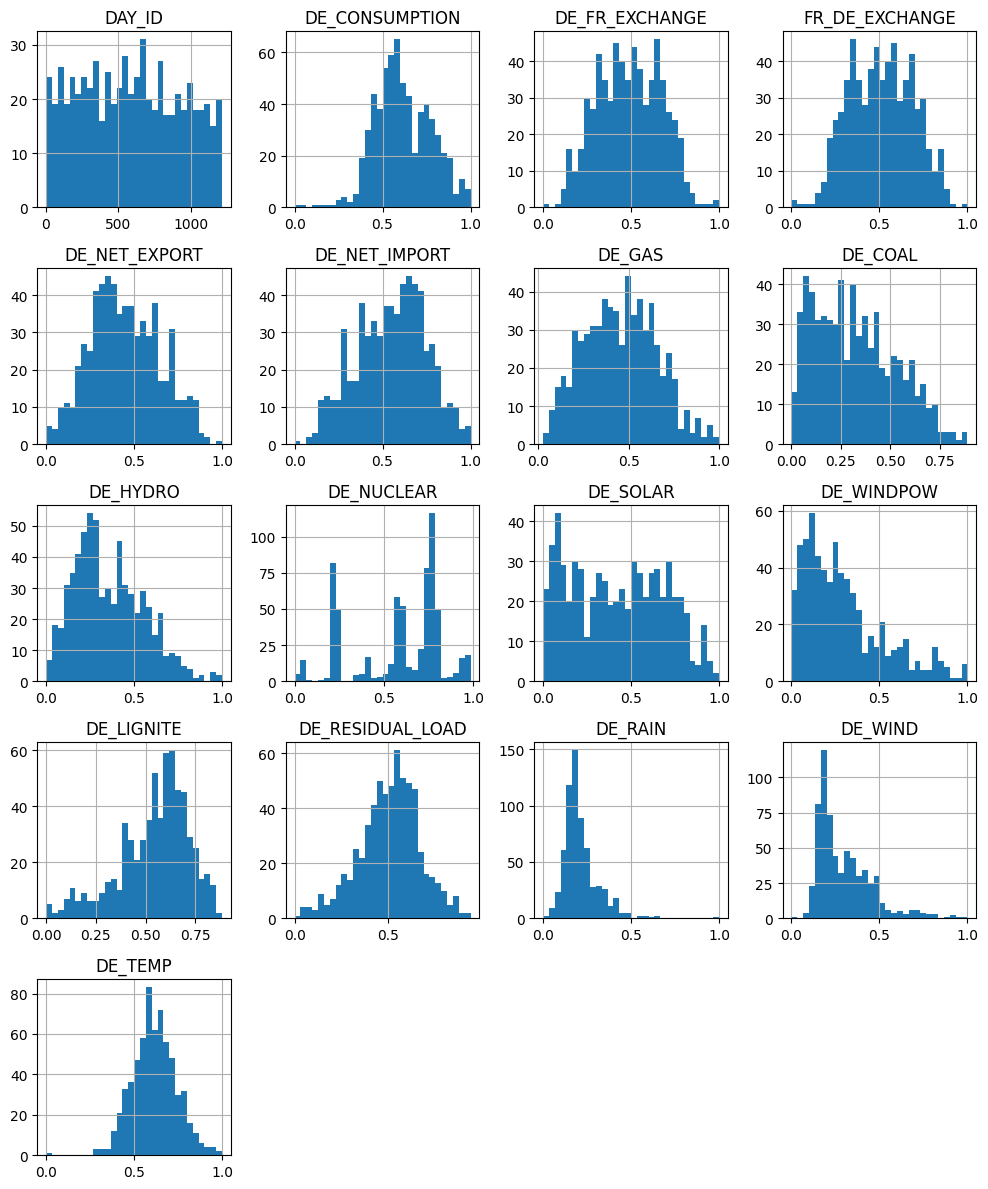

In [111]:
import matplotlib.pyplot as plt

X = X_de.copy()
X.hist( figsize=(10, 12), bins=30)
plt.tight_layout()

In [32]:
from sklearn.linear_model import LassoCV, LinearRegression
from sklearn.model_selection import TimeSeriesSplit

lr = LinearRegression()
la = LassoCV(max_iter=10000, random_state=42)
la.fit(X_de, y_de)
lr.fit(X_de, y_de)
# la.predict(X_de)


LinearRegression()

<Axes: xlabel='pca0', ylabel='pca1'>

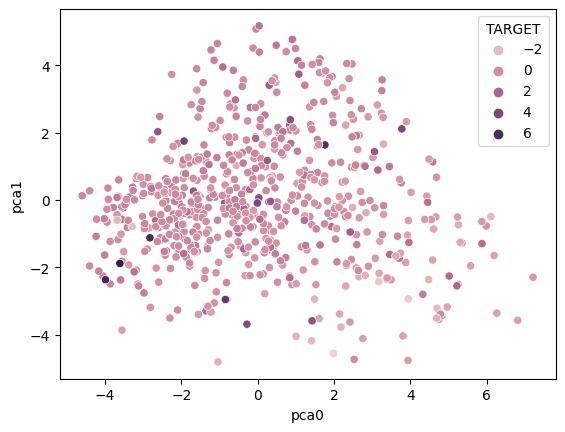

In [70]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


acp = PCA(2).set_output(transform='pandas')
df = acp.fit_transform(X_de.drop('DAY_ID', axis=1))
sns.scatterplot(data=df, x=df.iloc[:, 0], y=df.iloc[:,1], hue=y_de)

In [71]:
from scipy.stats import spearmanr

def score(X, y):
    return spearmanr(y, X).correlation

# pd.Series(lr.predict(X_de)).corr(y_de, method='spearman')

In [74]:
from sklearn.neighbors import KNeighborsRegressor


knn = KNeighborsRegressor()
knn.fit(X_de, y_de)
score(knn.predict(X_de), y_de)

0.37139506309454406

In [ ]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV

def test_lasso(X, y):
  lasso_cv = LassoCV(max_iter=10000, random_state=42, cv=TimeSeriesSplit(n_splits=5, test_size=5, gap=20))
  lasso_cv.fit(X, y)
  # lasso_cv.alpha_
  return pd.Series(lasso_cv.predict(X)).corr(y, method='spearman')

In [ ]:
X_fr

,DAY_ID,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,FR_NET_EXPORT,FR_NET_IMPORT,FR_GAS,FR_COAL,FR_HYDRO,FR_NUCLEAR,FR_SOLAR,FR_WINDPOW,FR_RESIDUAL_LOAD,FR_RAIN,FR_WIND,FR_TEMP
742,0,-0.484425,0.053828,-0.053828,0.667105,-0.667105,-0.724549,1.046927,0.540372,0.092964,0.534708,-1.070740,-0.213184,-0.859954,-1.153090,0.590372
1211,1,1.352105,0.477486,-0.477486,0.787019,-0.787019,1.761217,-0.695672,0.571130,1.896228,-0.113259,-0.479868,1.526717,-0.516153,-1.504028,0.233948
1408,2,-0.704655,-1.001280,1.001280,0.298288,-0.298288,0.069834,-0.656926,-0.979479,0.070083,0.393153,-1.045223,-0.431856,-0.395991,-0.987227,0.648409
329,3,-0.886626,-0.949388,0.949388,-0.515373,0.515373,-0.359438,-0.561712,-0.462717,-1.174423,2.204135,-0.939498,-0.784167,-1.111171,0.367856,-0.962650
512,5,-0.490198,0.284830,-0.284830,-1.638442,1.638442,0.147048,-0.655264,-0.476418,-1.471868,2.611244,-0.873683,-0.445512,-0.796565,-0.079251,1.476566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,1208,-0.749960,0.577166,-0.577166,-1.513610,1.513610,-0.237576,-0.640472,-0.460149,-1.510865,0.419938,-0.728785,-0.572052,2.511438,0.503451,-1.456450
1451,1209,1.438021,1.750769,-1.750769,-0.274796,0.274796,0.578663,1.190361,0.770658,1.538008,-0.248034,0.534519,1.330625,-0.233498,-0.544290,-0.392073
1007,1212,-0.544771,-0.143447,0.143447,-0.681774,0.681774,0.254511,-0.676455,-0.956891,-1.024319,0.909567,-0.559386,-0.486682,-0.266859,0.976381,-0.312248
873,1213,1.451294,-0.334936,0.334936,-0.006959,0.006959,1.274186,0.282164,1.728714,0.731710,-0.902136,1.598409,1.140591,1.863440,-0.381598,0.498584


In [ ]:
preprocessed = pd.DataFrame(pipeline.fit_transform(X_train), columns=pipeline.get_feature_names_out())

In [ ]:
reals = preprocessed.columns[preprocessed.columns.str.startswith('pipeline')] 

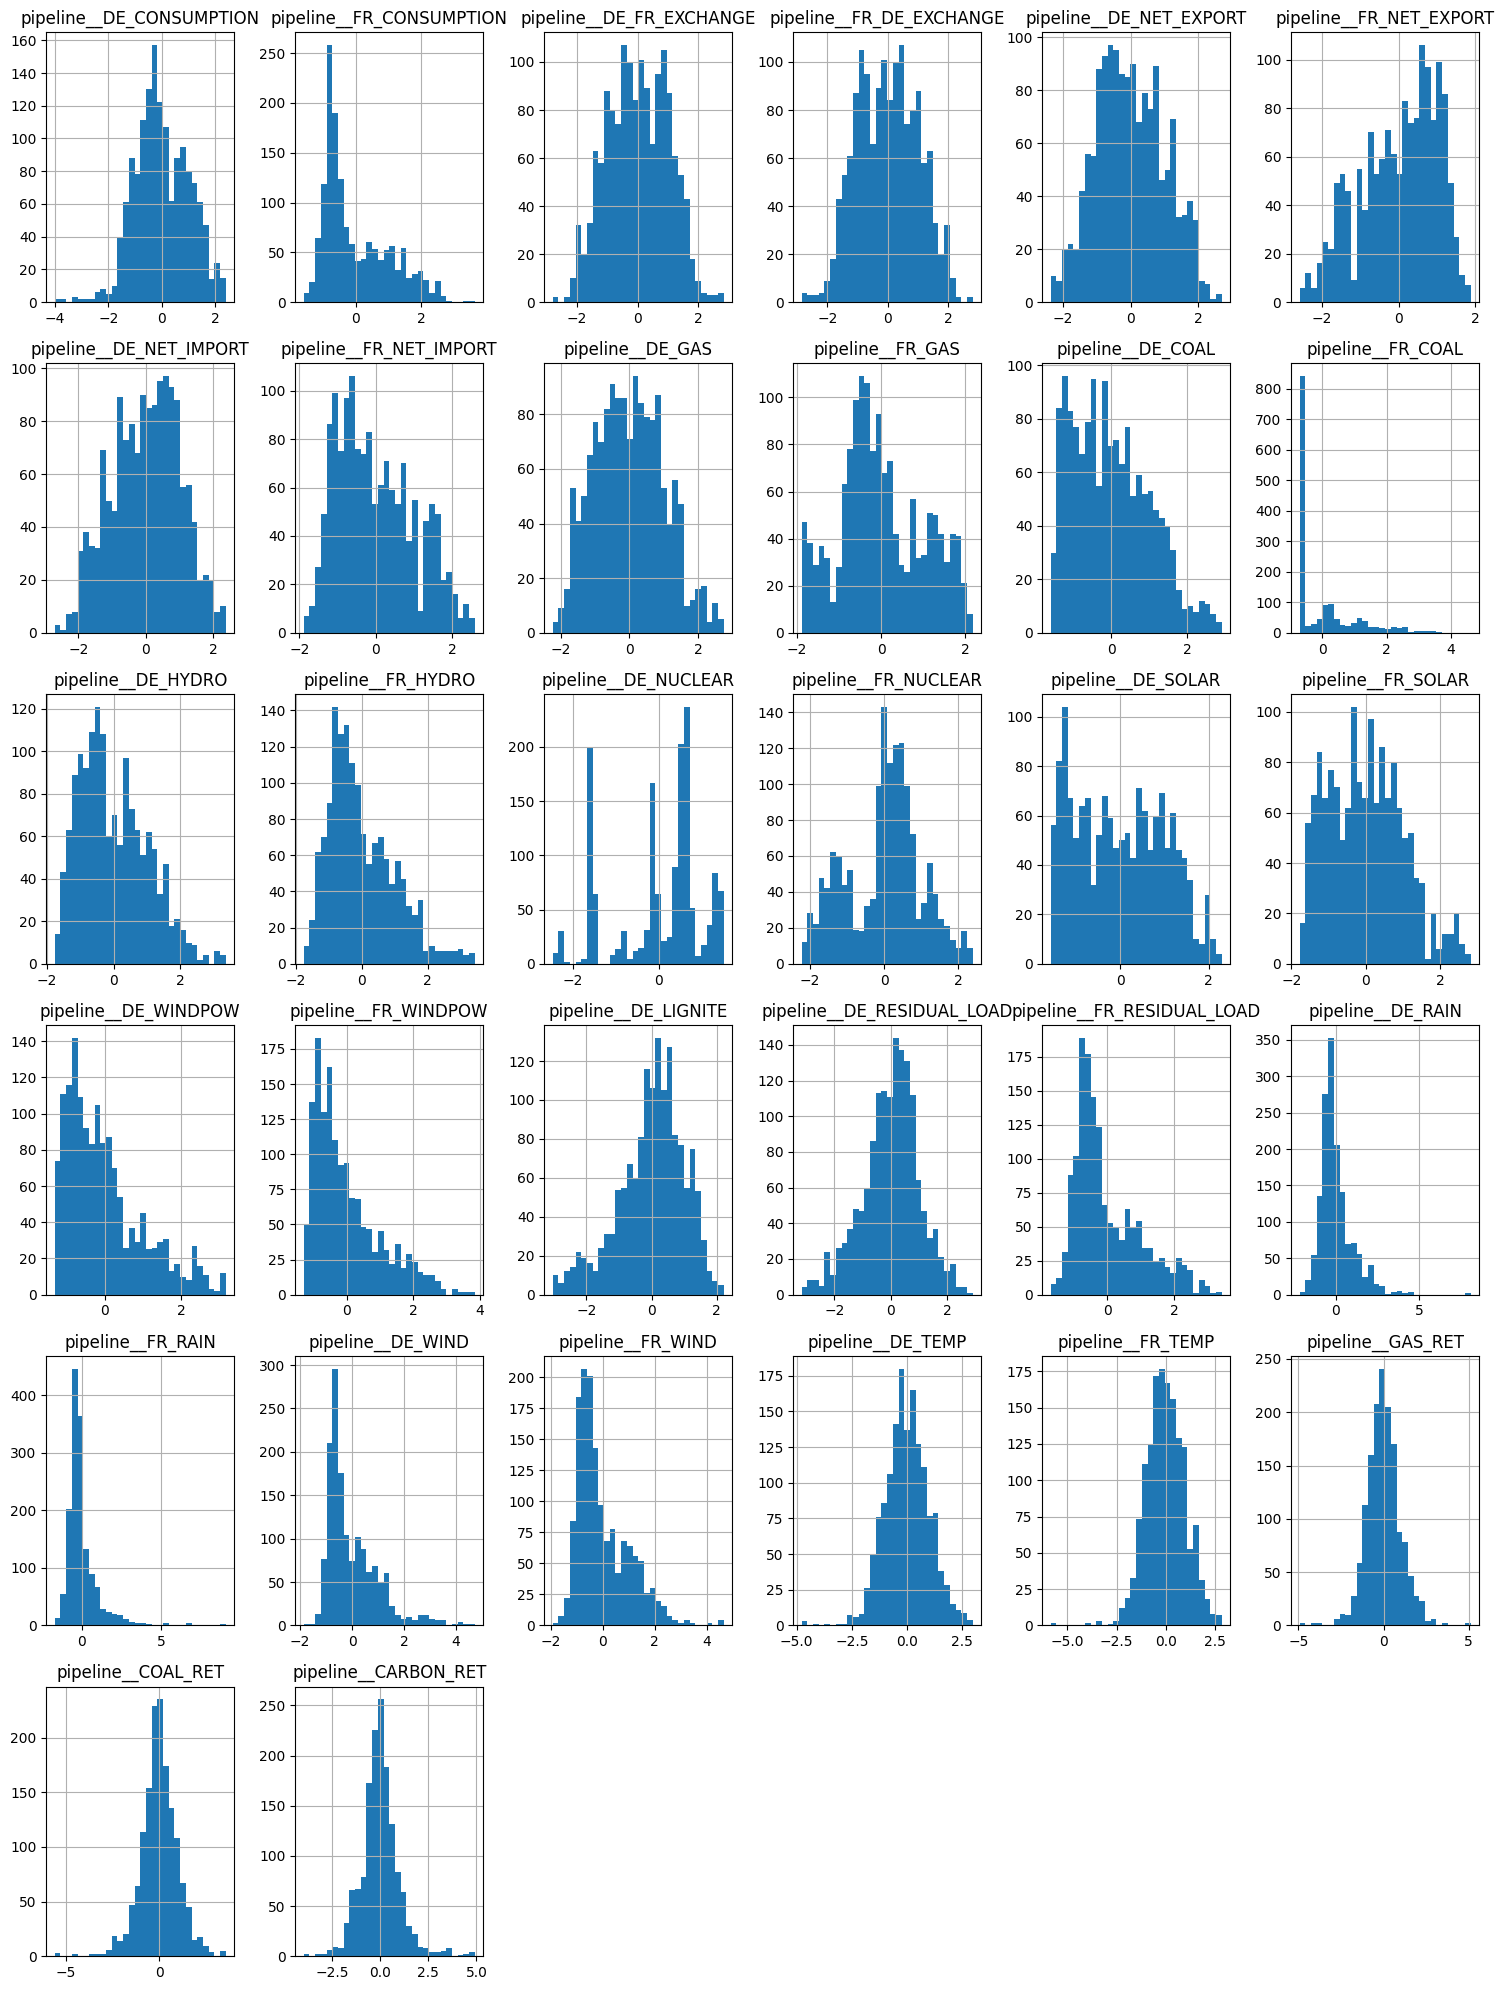

In [ ]:
preprocessed[preprocessed.columns[preprocessed.columns.str.startswith('pipeline')]].hist(figsize=(15,20), bins=30)
plt.tight_layout()

In [ ]:
pd.set_option('display.max_rows', 500)
preprocessed.corrwith(y_train['TARGET']).abs().sort_values(ascending=False)

pipeline__DE_WINDPOW          0.150287
pipeline__DE_NET_EXPORT       0.143289
pipeline__DE_NET_IMPORT       0.143289
pipeline__DE_RESIDUAL_LOAD    0.132555
pipeline__FR_WINDPOW          0.132523
pipeline__DE_GAS              0.096657
pipeline__DE_HYDRO            0.086127
pipeline__DE_WIND             0.080763
pipeline__FR_TEMP             0.054226
pipeline__DE_TEMP             0.052957
pipeline__FR_HYDRO            0.052820
pipeline__DE_CONSUMPTION      0.052565
pipeline__FR_WIND             0.052040
onehotencoder__COUNTRY_DE     0.048840
onehotencoder__COUNTRY_FR     0.048840
pipeline__DE_COAL             0.045181
pipeline__GAS_RET             0.041969
pipeline__FR_RAIN             0.039910
pipeline__DE_RAIN             0.038762
pipeline__CARBON_RET          0.038252
pipeline__DE_LIGNITE          0.034433
pipeline__FR_RESIDUAL_LOAD    0.030254
pipeline__FR_GAS              0.024652
pipeline__FR_NET_IMPORT       0.022709
pipeline__FR_NET_EXPORT       0.022709
pipeline__DE_SOLAR       

In [ ]:
from sklearn.linear_model import ElasticNet, Lasso, Ridge, LinearRegression

In [ ]:
train_FR = pipeline.fit_transform(X_train)

test = y_train['TARGET']

In [ ]:
models = [
    ElasticNet(alpha=0.001, l1_ratio=0.5),
    Lasso(alpha=0.001),
    Ridge(),
    LinearRegression()
]

predicts = []
for model in models:
    model.fit(train, test)
    predicts.append(model.predict(train))

In [ ]:
pd.Series(predicts[2]).corr(y_train['TARGET'], method='spearman')

0.2801819290234404

In [ ]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import TimeSeriesSplit


lasso_cv = LassoCV(max_iter=10000, random_state=42, cv=TimeSeriesSplit(n_splits=3, test_size=2, gap=2))
lasso_cv.fit(train, test)

LassoCV(cv=TimeSeriesSplit(gap=2, max_train_size=None, n_splits=3, test_size=2),
        max_iter=10000, random_state=42)

In [ ]:
lasso_cv.alpha_

0.10965443353797938

In [ ]:
pd.Series(lasso_cv.predict(train)).corr(test, method='spearman')

0.19284929257012756

In [ ]:
train_prediction = pd.Series(lasso_cv.predict(train))
train_prediction.corr(test, method='spearman')

0.19284929257012756

In [ ]:
sumbmission_inputs = pipeline.fit_transform(X_test)

In [ ]:
sumbmission_results = y_test['TARGET']

In [ ]:
prediction = pd.Series(lasso_cv.predict(sumbmission_inputs))
prediction.corr(sumbmission_results, method='spearman')

-0.04925592156166957

In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654 entries, 0 to 653
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                654 non-null    int64  
 1   DAY_ID            654 non-null    int64  
 2   COUNTRY           654 non-null    object 
 3   DE_CONSUMPTION    654 non-null    float64
 4   FR_CONSUMPTION    654 non-null    float64
 5   DE_FR_EXCHANGE    645 non-null    float64
 6   FR_DE_EXCHANGE    645 non-null    float64
 7   DE_NET_EXPORT     607 non-null    float64
 8   FR_NET_EXPORT     630 non-null    float64
 9   DE_NET_IMPORT     607 non-null    float64
 10  FR_NET_IMPORT     630 non-null    float64
 11  DE_GAS            654 non-null    float64
 12  FR_GAS            654 non-null    float64
 13  DE_COAL           654 non-null    float64
 14  FR_COAL           654 non-null    float64
 15  DE_HYDRO          654 non-null    float64
 16  FR_HYDRO          654 non-null    float64
 1